In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from SubjectiveLogic import Hyperopinion, HyperopinionInterface
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic.BeliefFusion import cumulative_fusion, averaging_fusion, weighted_fusion
from SubjectiveLogic.Trust import trust_discount_2e
from Model import *
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [4]:
NUM_AGENTS = 10
NUM_STEPS = 30

In [5]:
def simulate(initial_configuration: BeliefArray, influence_graph: InfluenceGraph, akv_num_steps=NUM_STEPS, sl_model=NUM_STEPS):
    akv_model = AKVModel(initial_configuration, influence_graph)
    sl_model_cumulative = akv_to_sl(akv_model)
    sl_model_average = akv_to_sl(akv_model)
    sl_model_weighted = akv_to_sl(akv_model)

    akv_model.simulate(akv_num_steps)
    sl_model_cumulative.simulate(sl_model, cumulative_fusion)
    sl_model_average.simulate(sl_model, averaging_fusion)
    sl_model_weighted.simulate(sl_model, weighted_fusion)

    return akv_model, sl_model_cumulative, sl_model_average, sl_model_weighted



[0.01, 0.99]
[0.1, 0.1]


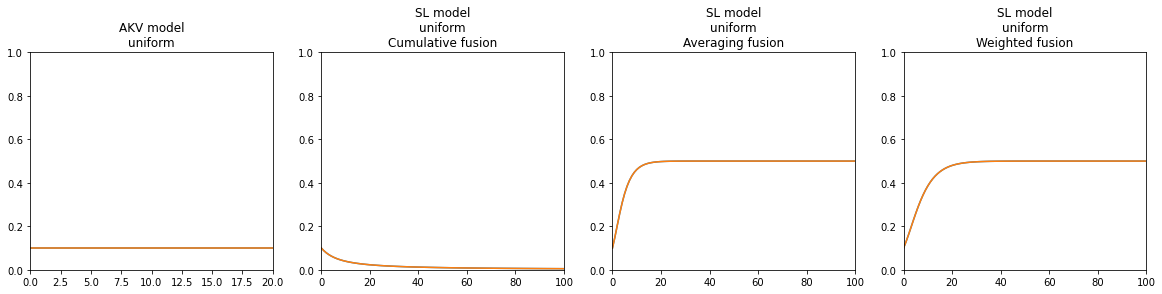

In [6]:
AKV_NUM_STEPS = 20
SL_STEPS = 100
NUM_AGENTS = 2

akv_model = AKVModel([0.1, 0.1], [[1, 0.5], [0.5, 1]])
sl_model_cumulative = akv_to_sl(akv_model)
sl_model_average = akv_to_sl(akv_model)
sl_model_weighted = akv_to_sl(akv_model)

akv_model.simulate(AKV_NUM_STEPS)
sl_model_cumulative.simulate(SL_STEPS, cumulative_fusion)
sl_model_average.simulate(SL_STEPS, averaging_fusion)
sl_model_weighted.simulate(SL_STEPS, weighted_fusion)

fig, ax = plt.subplots(1, 4)
fig.set(figwidth=20)
for i in range(NUM_AGENTS):
    print()
    ax[0].plot(list(range(AKV_NUM_STEPS + 1)), [akv_model.states[j][i] for j in range(AKV_NUM_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[3].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title("AKV model\nuniform")
ax[1].set_title("SL model\nuniform\nCumulative fusion")
ax[2].set_title("SL model\nuniform\nAveraging fusion")
ax[3].set_title("SL model\nuniform\nWeighted fusion")
for i in range(4):
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, AKV_NUM_STEPS if i == 0 else SL_STEPS])

# print(sl_model_cumulative.belief_array())
print([round(i, 2) for i in sl_model_cumulative.states[-1][1].P])
print([round(i, 2) for i in akv_model.states[-1]])

# Are we interpreting wrongly?
# Why is evidence being removed?
# Operational significance

In [7]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [8]:
AKV_NUM_STEPS = 20
SL_STEPS = 100
NUM_AGENTS = 2

data = []

for b1 in np.arange(0.1, 1, 0.1):
    for b2 in np.arange(0.1, 1, 0.1):
        akv_model = AKVModel([b1, b2], [[1, 0.5], [0.5, 1]])
        sl_model_cumulative = akv_to_sl(akv_model)
        akv_model.simulate(AKV_NUM_STEPS)
        sl_model_cumulative.simulate(SL_STEPS, cumulative_fusion)
        data.append([b1, b2, sl_model_cumulative.states[-1][0].P[0], akv_model.states[-1][0]])

df = pd.DataFrame(data, columns=["P(A[0], X)", "P(B[0], X)", "P(A[inf], X)", "AKV.Bel(inf, A)"]);


In [9]:
df

,"P(A[0], X)","P(B[0], X)","P(A[inf], X)","AKV.Bel(inf, A)"
0,0.1,0.1,0.005080,0.10
1,0.1,0.2,0.005157,0.15
2,0.1,0.3,0.005202,0.20
3,0.1,0.4,0.005235,0.25
4,0.1,0.5,0.005256,0.30
5,0.1,0.6,0.087030,0.35
6,0.1,0.7,0.186950,0.40
7,0.1,0.8,0.315332,0.45
8,0.1,0.9,0.499324,0.50
9,0.2,0.1,0.005231,0.15


In [10]:
sl_model_weighted.states[0]


[Hyperopinion(2, [0.  0.8], [0.5 0.5]), Hyperopinion(2, [0.  0.8], [0.5 0.5])]

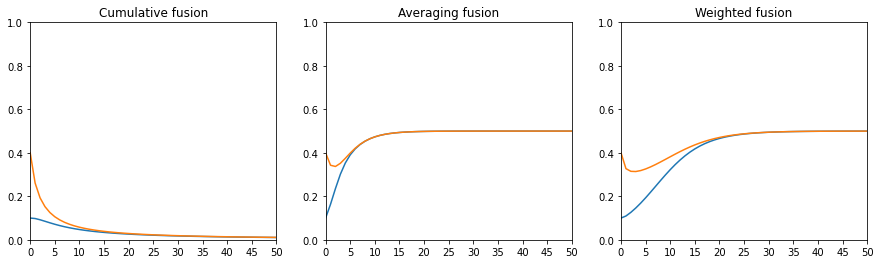

In [11]:
AKV_NUM_STEPS = 10
SL_STEPS = 50
NUM_AGENTS = 2

akv_model = AKVModel([0.1, 0.4], [[1, 0.5], [0.5, 1]])
sl_model_cumulative = akv_to_sl(akv_model)
sl_model_average = akv_to_sl(akv_model)
sl_model_weighted = akv_to_sl(akv_model)

akv_model.simulate(AKV_NUM_STEPS)
sl_model_cumulative.simulate(SL_STEPS, cumulative_fusion)
sl_model_average.simulate(SL_STEPS, averaging_fusion)
sl_model_weighted.simulate(SL_STEPS, weighted_fusion)

fig, ax = plt.subplots(1, 3)
fig.set(figwidth=15)
for i in range(NUM_AGENTS):
    print()
    ax[0].plot(list(range(SL_STEPS + 1)), [sl_model_cumulative.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[1].plot(list(range(SL_STEPS + 1)), [sl_model_average.states[j][i].P[0] for j in range(SL_STEPS + 1)])
    ax[2].plot(list(range(SL_STEPS + 1)), [sl_model_weighted.states[j][i].P[0] for j in range(SL_STEPS + 1)])

ax[0].set_title(r"Cumulative fusion")
ax[1].set_title(r"Averaging fusion")
ax[2].set_title(r"Weighted fusion")
for i in range(3):
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, SL_STEPS])
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))

In [12]:
sl_model_cumulative.trust_graph

[[None, Hyperopinion(2, [0.5 0.5], [0.5 0.5])],
 [Hyperopinion(2, [0.5 0.5], [0.5 0.5]), None]]

In [13]:
sl_model_weighted.states

[[Hyperopinion(2, [0.  0.8], [0.5 0.5]),
  Hyperopinion(2, [0.  0.2], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.781081], [0.5 0.5]),
  Hyperopinion(2, [0.       0.345455], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.747449], [0.5 0.5]),
  Hyperopinion(2, [0.       0.370178], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.707368], [0.5 0.5]),
  Hyperopinion(2, [0.       0.371965], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.662343], [0.5 0.5]),
  Hyperopinion(2, [0.       0.363186], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.613489], [0.5 0.5]),
  Hyperopinion(2, [0.       0.348308], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.561965], [0.5 0.5]),
  Hyperopinion(2, [0.       0.329483], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.509034], [0.5 0.5]),
  Hyperopinion(2, [0.       0.307998], [0.5 0.5])],
 [Hyperopinion(2, [0.      0.45601], [0.5 0.5]),
  Hyperopinion(2, [0.       0.284782], [0.5 0.5])],
 [Hyperopinion(2, [0.       0.404162], [0.5 0.5]),
  Hyperopinion(2, [0.       0.260603], [0.5 

In [14]:
akv_model = AKVModel([0.4, 0.2], [[1, 0.5], [0.5, 1]])
akv_model.simulate(1)
akv_model.states

[[0.4, 0.2], array([0.35, 0.25])]

In [15]:
0.325+0.275

0.6000000000000001